#                  📊 FAST FOOD DATA ANALYSIS AND VISUALIZATION

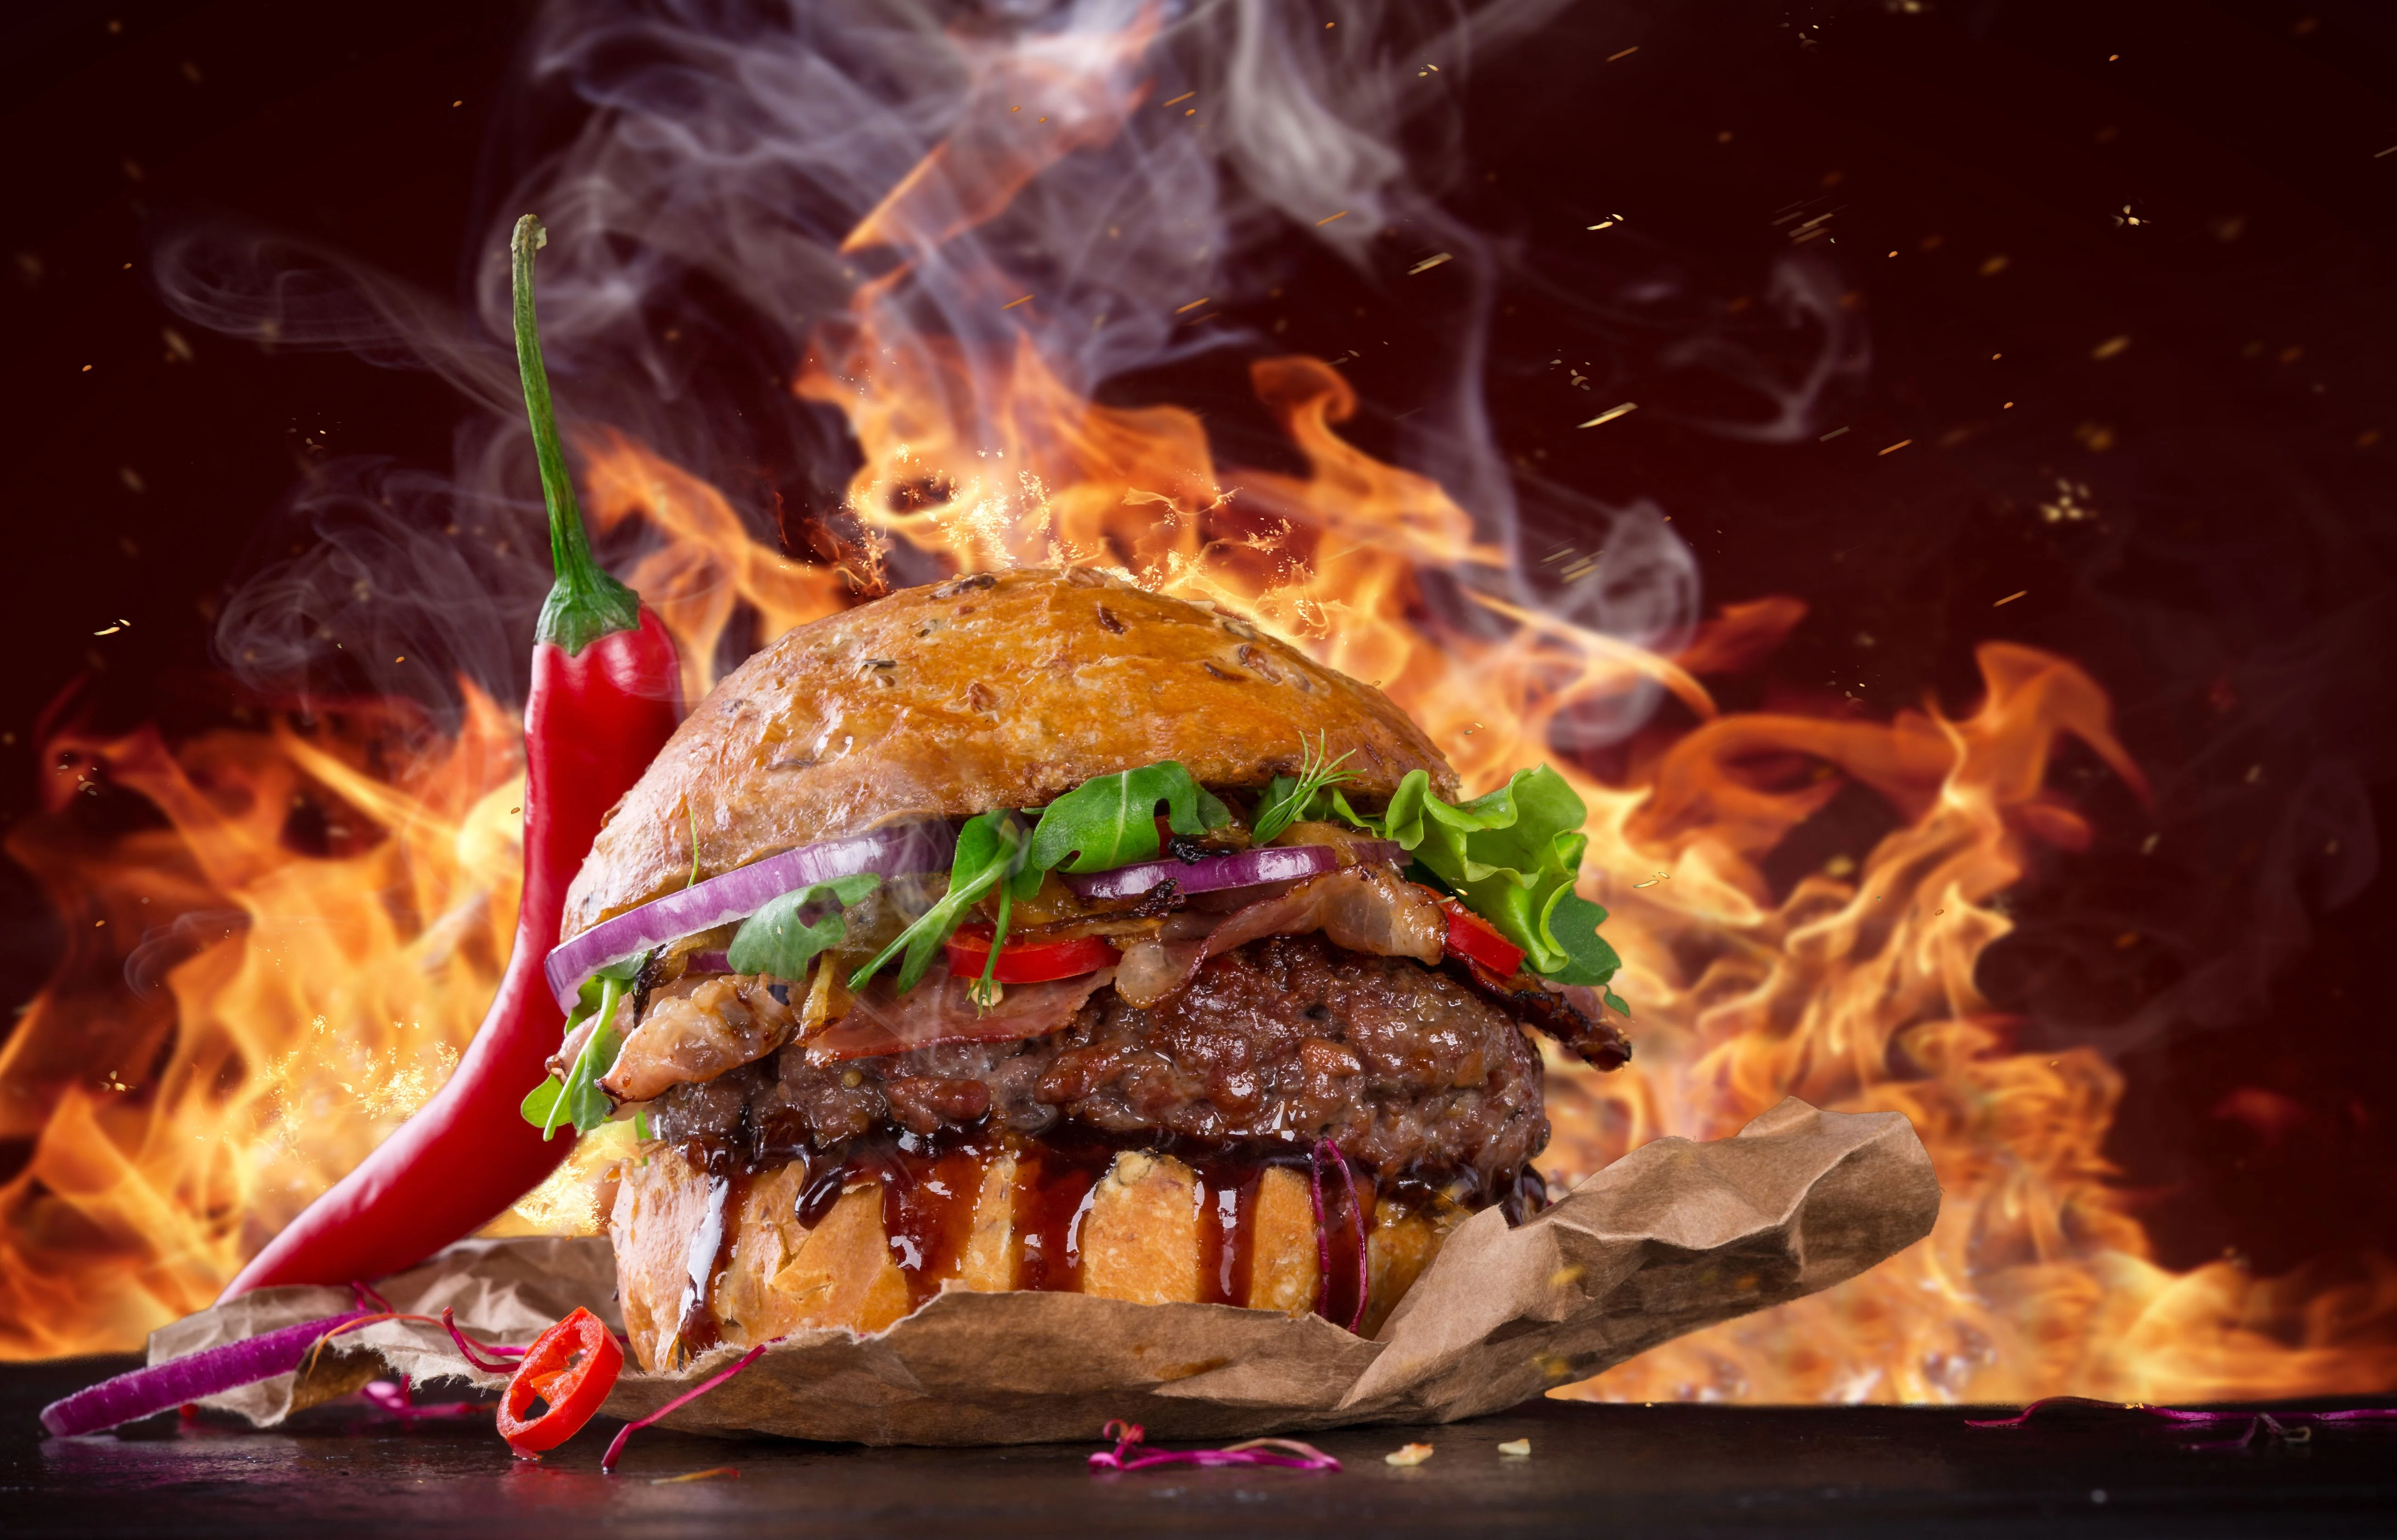

### IMPORTS

In [53]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

### DATAFRAME LOAD

In [54]:
data = pd.read_csv('Balaji Fast Food Sales.csv')
data.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening


### DATA PROCESSING

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            1000 non-null   int64 
 1   date                1000 non-null   object
 2   item_name           1000 non-null   object
 3   item_type           1000 non-null   object
 4   item_price          1000 non-null   int64 
 5   quantity            1000 non-null   int64 
 6   transaction_amount  1000 non-null   int64 
 7   transaction_type    893 non-null    object
 8   received_by         1000 non-null   object
 9   time_of_sale        1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [56]:
null_var=data.isnull().sum()/data.shape[0] *100
null_var

order_id               0.0
date                   0.0
item_name              0.0
item_type              0.0
item_price             0.0
quantity               0.0
transaction_amount     0.0
transaction_type      10.7
received_by            0.0
time_of_sale           0.0
dtype: float64

In [57]:
data.isnull().sum()

order_id                0
date                    0
item_name               0
item_type               0
item_price              0
quantity                0
transaction_amount      0
transaction_type      107
received_by             0
time_of_sale            0
dtype: int64

In [58]:
data.drop_duplicates(inplace=True)

In [59]:
data.shape

(1000, 10)

In [60]:
data.dropna(inplace=True)

In [61]:
data.isnull().sum()

order_id              0
date                  0
item_name             0
item_type             0
item_price            0
quantity              0
transaction_amount    0
transaction_type      0
received_by           0
time_of_sale          0
dtype: int64

In [62]:
null_var=data.isnull().sum()/data.shape[0] *100
null_var

order_id              0.0
date                  0.0
item_name             0.0
item_type             0.0
item_price            0.0
quantity              0.0
transaction_amount    0.0
transaction_type      0.0
received_by           0.0
time_of_sale          0.0
dtype: float64

In [63]:
data.shape

(893, 10)

In [64]:
data.to_excel("New-clean-data_final.xlsx")

In [65]:
data = pd.read_excel("New-clean-data_final.xlsx",index_col=0)
data

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening
5,6,11/14/2022,Vadapav,Fastfood,20,10,200,Cash,Mr.,Evening
...,...,...,...,...,...,...,...,...,...,...
991,992,10/21/2022,Sandwich,Fastfood,60,5,300,Cash,Mr.,Morning
992,993,7/17/2022,Frankie,Fastfood,50,3,150,Online,Mrs.,Night
993,994,11-01-2022,Panipuri,Fastfood,20,2,40,Online,Mrs.,Evening
994,995,6/18/2022,Sugarcane juice,Beverages,25,1,25,Online,Mr.,Night


### VISUALIZATIONS

Text(0, 0.5, 'Total Amount')

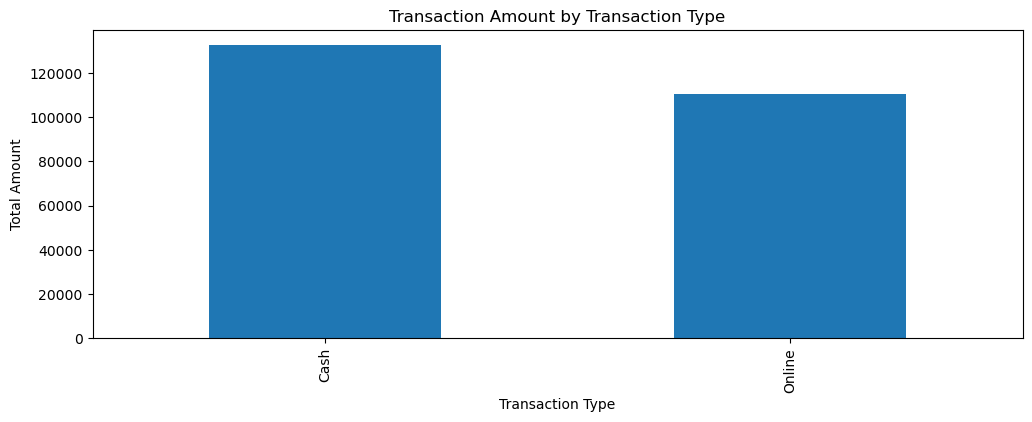

In [66]:
plt.figure(figsize=(12, 4))
transaction_type_totals = data.groupby('transaction_type')['transaction_amount'].sum()
transaction_type_totals.plot(kind='bar', title='Transaction Amount by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Total Amount')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Evening'),
  Text(1, 0, 'Night'),
  Text(2, 0, 'Afternoon'),
  Text(3, 0, 'Midnight'),
  Text(4, 0, 'Morning')])

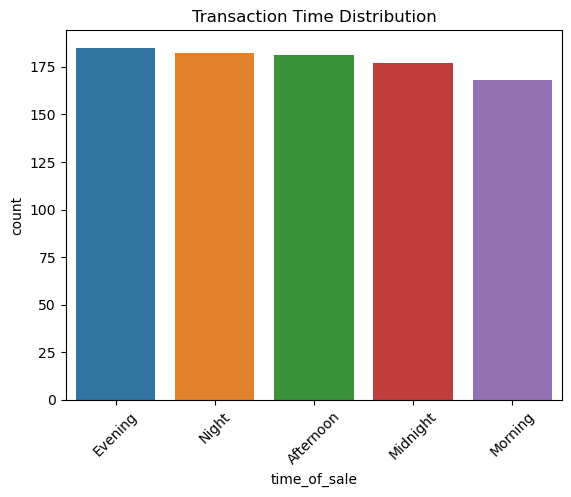

In [67]:
sns.countplot(x='time_of_sale', data=data, order=data['time_of_sale'].value_counts().index)
plt.title('Transaction Time Distribution')
plt.xticks(rotation=45)

Text(0.5, 0, 'Amount')

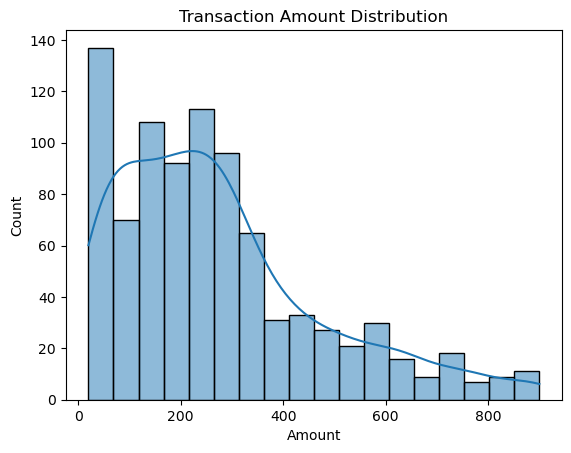

In [68]:
sns.histplot(data['transaction_amount'], kde=True)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')

Text(0, 0.5, 'Total Quantity Sold')

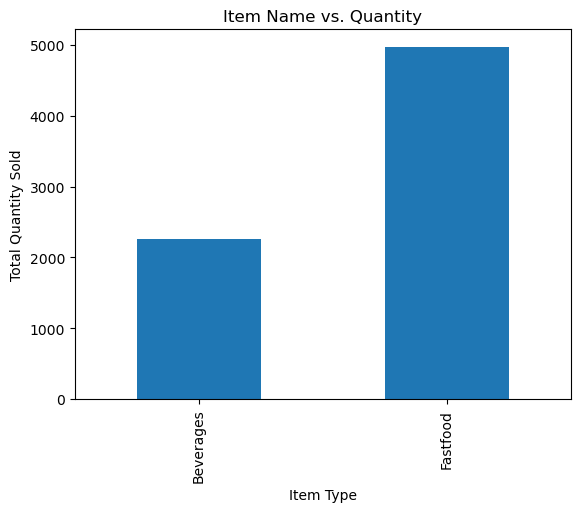

In [69]:
item_quantity = data.groupby('item_type')['quantity'].sum()
item_quantity.plot(kind='bar', title='Item Name vs. Quantity')
plt.xlabel('Item Type')
plt.ylabel('Total Quantity Sold')

In [70]:
fig = px.pie(data, names='item_type', title='Item Type Distribution')
fig.update_traces(textposition='inside', textinfo='percent+label')

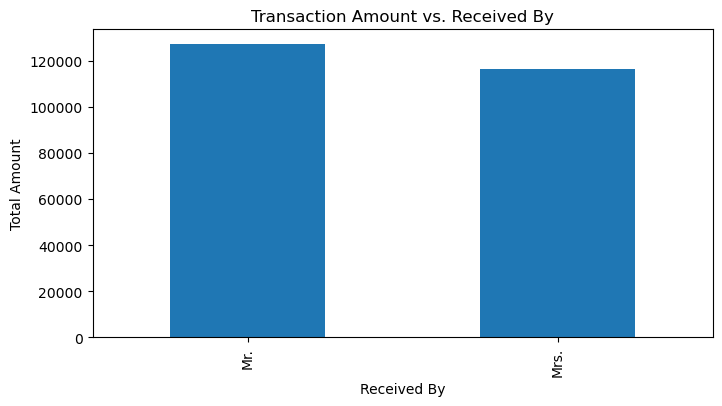

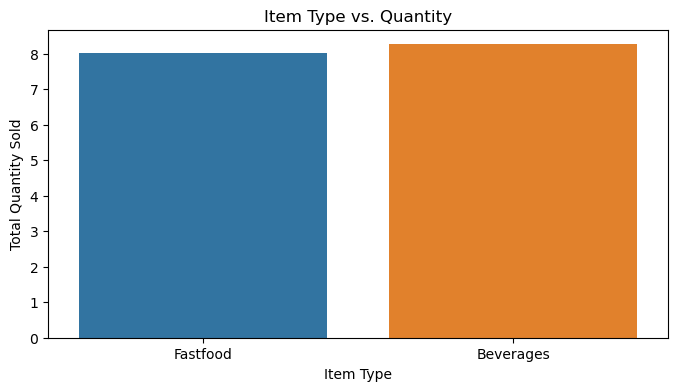

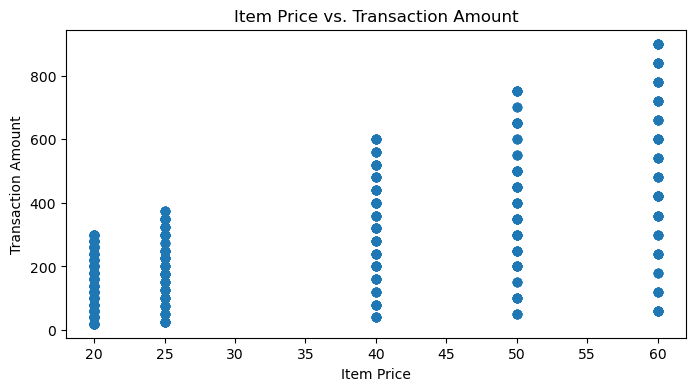

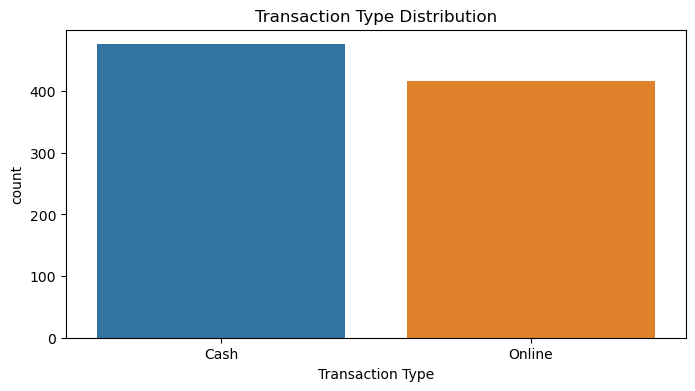

In [71]:
# Visualization 6: Transaction Amount vs. Transaction Type (Plotly)
fig = px.bar(data, x='transaction_type', y='transaction_amount', title='Transaction Amount vs. Transaction Type')
fig.update_layout(xaxis_title='Transaction Type', yaxis_title='Transaction Amount')

# Visualization 7: Transaction Amount vs. Received By (Matplotlib)
plt.figure(figsize=(8, 4))
received_by_totals = data.groupby('received_by')['transaction_amount'].sum()
received_by_totals.plot(kind='bar', title='Transaction Amount vs. Received By')
plt.xlabel('Received By')
plt.ylabel('Total Amount')

# Visualization 8: Item Type vs. Quantity (Seaborn)
plt.figure(figsize=(8, 4))
sns.barplot(x='item_type', y='quantity', data=data, ci=None)
plt.title('Item Type vs. Quantity')
plt.xlabel('Item Type')
plt.ylabel('Total Quantity Sold')

# Visualization 9: Item Price vs. Transaction Amount (Matplotlib)
plt.figure(figsize=(8, 4))
plt.scatter(data['item_price'], data['transaction_amount'])
plt.title('Item Price vs. Transaction Amount')
plt.xlabel('Item Price')
plt.ylabel('Transaction Amount')

# Visualization 10: Transaction Type Distribution (Seaborn)
plt.figure(figsize=(8, 4))
sns.countplot(x='transaction_type', data=data, order=data['transaction_type'].value_counts().index)
plt.title('Transaction Type Distribution')
plt.xlabel('Transaction Type')

# Show the visualizations
plt.show()

C:\Users\Shree\AppData\Local\Temp\ipykernel_2236\2973657723.py:5: FutureWarning:

The default value of regex will change from True to False in a future version.



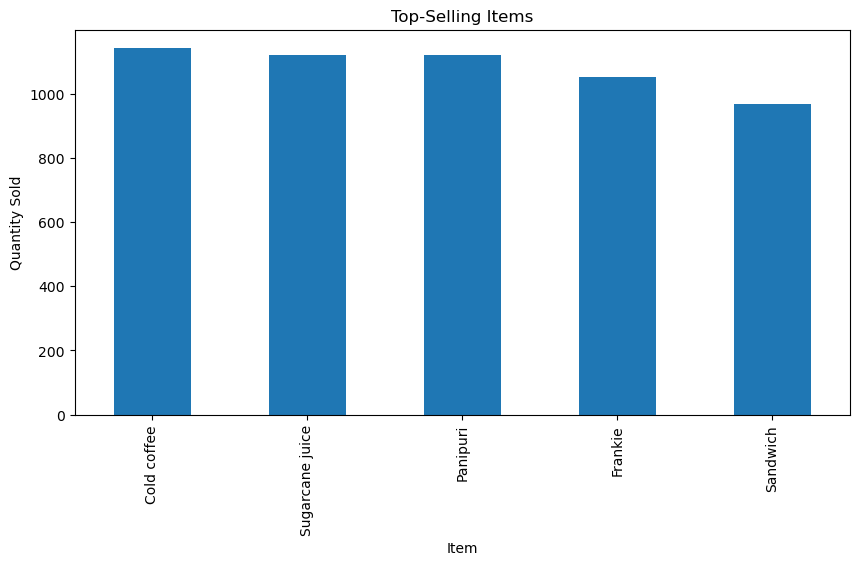

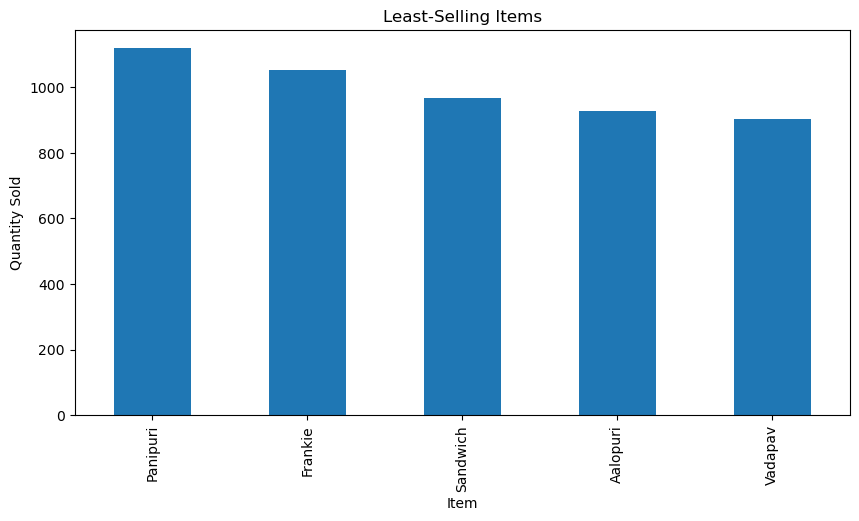

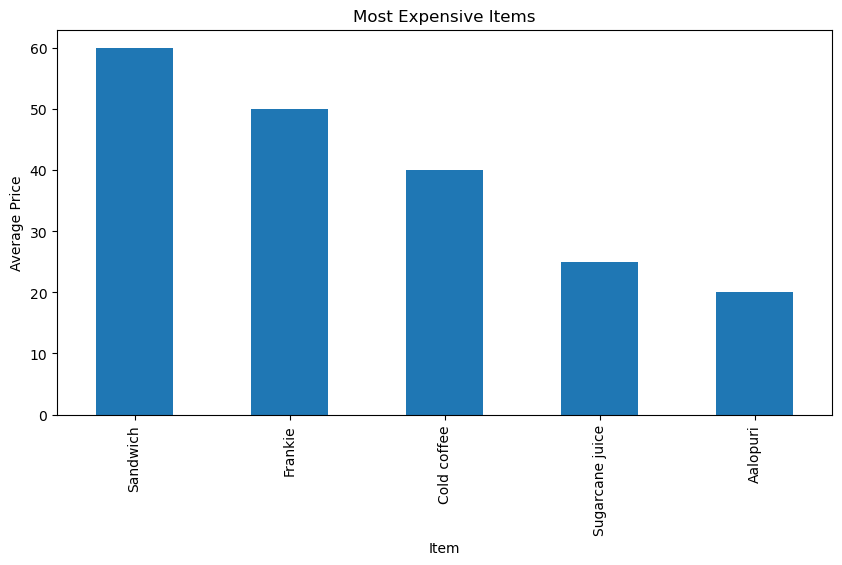

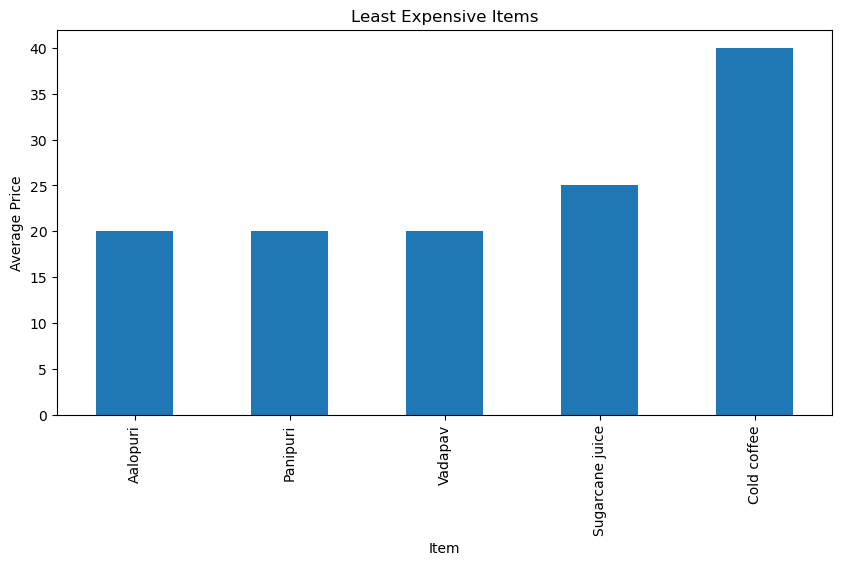

In [73]:
from datetime import datetime
# Clean the 'date' column to ensure all records have the 'mm-dd-yyyy' format
my_str = '09-24-2023'
data['date'] = data['date'].str.replace('/', '-')
data['date'] = data['date'].str.replace(r'(\d{2})-(\d{2})-(\d{4})', r'\2-\1-\3')

# Convert the 'date' column to datetime
data['date'] = pd.to_datetime(data['date'], format='%m-%d-%Y')

# Top-selling items
items_sold = data.groupby('item_name')['quantity'].sum().sort_values(ascending=False)
top_items_sold = items_sold.head(5)

# Least-selling items
bottom_items_sold = items_sold.tail(5)

# Most expensive and least expensive items
average_price = data.groupby('item_name')['item_price'].mean()
top_items_price = average_price.sort_values(ascending=False).head(5)
bottom_items_price = average_price.sort_values().head(5)

# Visualization of top-selling items
plt.figure(figsize=(10, 5))
top_items_sold.plot(kind='bar')
plt.title('Top-Selling Items')
plt.xlabel('Item')
plt.ylabel('Quantity Sold')
plt.show()

# Visualization of least-selling items
plt.figure(figsize=(10, 5))
bottom_items_sold.plot(kind='bar')
plt.title('Least-Selling Items')
plt.xlabel('Item')
plt.ylabel('Quantity Sold')
plt.show()

# Visualization of most expensive items
plt.figure(figsize=(10, 5))
top_items_price.plot(kind='bar')
plt.title('Most Expensive Items')
plt.xlabel('Item')
plt.ylabel('Average Price')
plt.show()

# Visualization of least expensive items
plt.figure(figsize=(10, 5))
bottom_items_price.plot(kind='bar')
plt.title('Least Expensive Items')
plt.xlabel('Item')
plt.ylabel('Average Price')
plt.show()

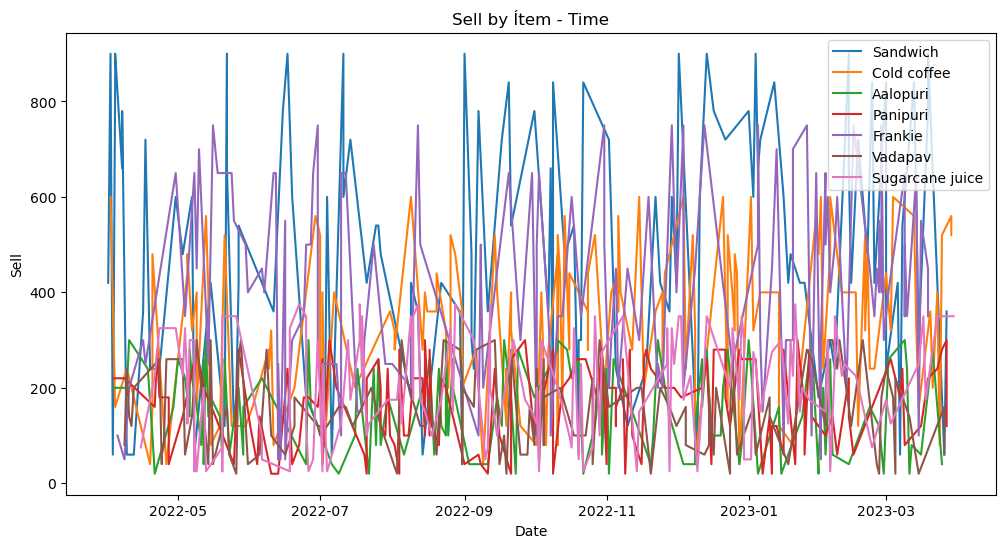

In [74]:
data['date'] = pd.to_datetime(data['date'])

data = data.sort_values('date')

plt.figure(figsize=(12, 6))
items = data['item_name'].unique()
for item in items:
    item_data = data[data['item_name'] == item]
    plt.plot(item_data['date'], item_data['transaction_amount'], label=item)

plt.title('Sell by Ítem - Time')
plt.xlabel('Date')
plt.ylabel('Sell')
plt.legend()
plt.show()

In [75]:
training_data = data.copy()

In [76]:
from sklearn.preprocessing import LabelEncoder

In [90]:
# Encoding item_name column
encoder_item_name = LabelEncoder()
training_data.item_name = encoder_item_name.fit_transform(training_data.item_name)

# Encoding item_type column
encoder_item_type = LabelEncoder()
training_data.item_type = encoder_item_type.fit_transform(training_data.item_type)

# Encoding transaction_type column
encoder_transaction_type = LabelEncoder()
training_data.transaction_type = encoder_transaction_type.fit_transform(training_data.transaction_type)

# Encoding received_by column
encoder_received_by = LabelEncoder()
training_data.received_by = encoder_received_by.fit_transform(training_data.received_by)

# Encoding time_of_sale column
encoder_time_of_sale = LabelEncoder()
training_data.time_of_sale = encoder_time_of_sale.fit_transform(training_data.time_of_sale)

# Encoding date column
encoder_date = LabelEncoder()
training_data.date = encoder_date.fit_transform(training_data.date)

In [91]:
training_data

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
690,691,0,4,1,60,7,420,0,1,1
571,572,1,4,1,60,15,900,0,0,0
622,623,1,1,0,40,15,600,0,0,2
393,394,2,4,1,60,1,60,0,1,3
412,413,2,0,1,20,10,200,1,1,2
...,...,...,...,...,...,...,...,...,...,...
431,432,336,3,1,20,6,120,1,0,0
774,775,336,4,1,60,6,360,0,0,4
547,548,337,1,0,40,14,560,0,0,0
96,97,337,1,0,40,13,520,1,0,1


<AxesSubplot:>

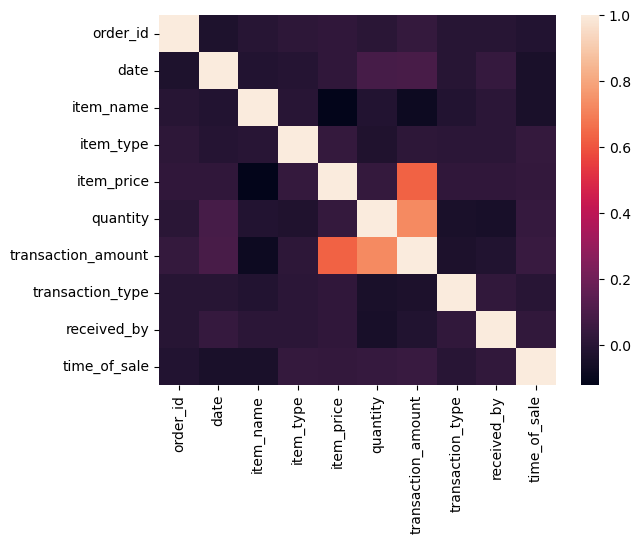

In [92]:
sns.heatmap(training_data.corr())

### Splitting Training and Test Data

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
training_data.columns

Index(['order_id', 'date', 'item_name', 'item_type', 'item_price', 'quantity',
       'transaction_amount', 'transaction_type', 'received_by',
       'time_of_sale'],
      dtype='object')

In [95]:
# Independent Variales
x = training_data.drop(columns = ["transaction_amount"])

# Dependent Variable
y = training_data["transaction_amount"]

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.1,random_state=10)

In [96]:
# finding length of train and test data
[len(x) for x in [X_train, X_test, y_train, y_test]]

[803, 90, 803, 90]

### 1. Training and Testing with Random Forest Regressor

In [97]:
from sklearn.ensemble import RandomForestRegressor

In [98]:
RF_Model = RandomForestRegressor(n_estimators = 120, random_state = 0)

In [99]:
RF_Model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=120, random_state=0)

In [100]:
pred = RF_Model.predict(X_test)

In [101]:
r2_score_test_rf=r2_score(y_test,pred)
mean_squared_error_test_rf=mean_squared_error(y_test,pred)
(r2_score_test_rf,mean_squared_error_test_rf)

(0.9999625140835802, 1.5189621913580185)

In [102]:
pred_train = RF_Model.predict(X_train)

In [103]:
r2_score_train_rf=r2_score(y_train,pred_train)
mean_squared_error_train_rf=mean_squared_error(y_train,pred_train)
(r2_score_train_rf,mean_squared_error_train_rf)

(0.9999899514415022, 0.4118950636501988)

In [104]:
df2 = pd.DataFrame({"y_test" : y_test,"pred":pred})
df2

,y_test,pred
203,280,280.333333
841,40,40.000000
897,400,399.583333
752,25,25.000000
364,200,200.000000
...,...,...
757,60,60.000000
408,180,180.000000
624,900,899.000000
223,350,350.000000


In [105]:
(df2.pred.max(),df2.pred.min())

(899.0, 20.0)

### 2. Training and Testing with XGBoost Regressor

In [106]:
from sklearn.metrics import r2_score,mean_squared_error
import xgboost as xg

In [107]:
XG_Model = xg.XGBRegressor(objective ='reg:squarederror',n_estimators = 120, seed = 123)  

In [108]:
XG_Model.fit(X_train, y_train)

C:\Users\Shree\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=120, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=123,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [109]:
pred = XG_Model.predict(X_test)

In [110]:
r2_score_test_xg=r2_score(y_test,pred)
mean_squared_error_test_xg=mean_squared_error(y_test,pred)
(r2_score_test_xg,mean_squared_error_test_xg)

(0.999973447478324, 1.0759314527473585)

In [111]:
pred_train = XG_Model.predict(X_train)

In [112]:
r2_score_train_xg=r2_score(y_train,pred_train)
mean_squared_error_train_xg=mean_squared_error(y_train,pred_train)
(r2_score_train_xg,mean_squared_error_train_xg)

(0.9999999742944128, 0.001053683918058009)

In [113]:
df = pd.DataFrame({"y_test" : y_test,"pred":pred})
df

,y_test,pred
203,280,278.145874
841,40,40.063675
897,400,399.727692
752,25,25.268280
364,200,199.835480
...,...,...
757,60,59.929356
408,180,180.215363
624,900,900.051575
223,350,350.412018


In [114]:
(df.pred.max(),df.pred.min())

(900.0515747070312, 19.81123161315918)

### Comparing the Three Models

In [115]:
model_comparison=pd.DataFrame({'Models':['Xgboost','Random Forest'],
                'r2_score_train':[r2_score_train_xg,r2_score_train_rf],
                'mean_squared_error_train':[mean_squared_error_train_xg,mean_squared_error_train_rf],
                'r2_score_test':[r2_score_test_xg,r2_score_test_rf],
                'mean_squared_error_test':[mean_squared_error_test_xg,mean_squared_error_test_rf]})

In [116]:
model_comparison

,Models,r2_score_train,mean_squared_error_train,r2_score_test,mean_squared_error_test
0,Xgboost,1.00000,0.001054,0.999973,1.075931
1,Random Forest,0.99999,0.411895,0.999963,1.518962


#### As we can see from the performance of all the two models, XGboost is the best model for our dataset as its r2 score for the test data is highest

### Calculating Approximate Latency for Model

In [122]:
import time 

In [123]:
# Length of test data
l = len(X_test)
l

90

In [124]:
# Measuring response time of model 
pred_time_list=[]
for i in range(10): 
    start = time.time() 
    result = RF_Model.predict(X_test)
    end = time.time()
    pred_time_list.append(end-start)
print(pred_time_list) 

[0.024585723876953125, 0.01662135124206543, 0.01616501808166504, 0.01765155792236328, 0.00843191146850586, 0.008040904998779297, 0.007973194122314453, 0.008053779602050781, 0.0, 0.015629291534423828]


#### We measured the response time of our model 10 times for better results. We will now took the average of all the 10 response times and will divide it by length of test data in order to get response time for a particular input

In [125]:
# Measuring response time of model for a particular input
latency = pd.Series(pred_time_list).mean()/l

In [126]:
latency

0.00013683636983235676

#### The response time of our model for a particular input of dataset came out to be 0.00012013594309488933